In [1]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
from scipy import linalg as la

# Problems 1, 3, and 5
def newton(f, x0, Df, tol=1e-5, maxiter=15, alpha=1.):
    """Use Newton's method to approximate a zero of the function f.

    Parameters:
        f (function): a function from R^n to R^n (assume n=1 until Problem 5).
        x0 (float or ndarray): The initial guess for the zero of f.
        Df (function): The derivative of f, a function from R^n to R^(nxn).
        tol (float): Convergence tolerance. The function should returns when
            the difference between successive approximations is less than tol.
        maxiter (int): The maximum number of iterations to compute.
        alpha (float): Backtracking scalar (Problem 3).

    Returns:
        (float or ndarray): The approximation for a zero of f.
        (bool): Whether or not Newton's method converged.
        (int): The number of iterations computed.
    """
    iters = 0               #count the number of iterations
    converged = False       #set the bool regarding convergence to false
    for k in range(maxiter):
        if np.isscalar(x0):
            x1 = x0 - (alpha * (f(x0) / Df(x0)))
            iters += 1                              #apply Newton's Method until we are within the tolerance or until we have reached the max iterations
            if np.abs(x1 - x0) < tol:
                converged = True              #mark the bool to true if it converges
                break 
            x0 = x1
        else:
            yk = la.solve(Df(x0), f(x0))      #if f has multivariate domain or range use Newton's Method for higher dimensions
            x1 = x0 - alpha * yk              #use backtracking
            iters += 1
            if la.norm(x1 - x0) < tol:        #use the norm to see if within range of tolerance
                converged = True
                break
            x0 = x1

    return x1, converged, iters

def test3():
    f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
    Df = lambda x: (1./3)*np.power(np.abs(x), -2./3)
    print(newton(f, .01, Df))
    print(newton(f, .01, Df, alpha=.4))
test3()

(-327.6800000000003, False, 15)
(6.400000000000134e-07, True, 6)


In [2]:
# Problem 2
def prob2(N1, N2, P1, P2):
    """Use Newton's method to solve for the constant r that satisfies

                P1[(1+r)**N1 - 1] = P2[1 - (1+r)**(-N2)].

    Use r_0 = 0.1 for the initial guess.

    Parameters:
        P1 (float): Amount of money deposited into account at the beginning of
            years 1, 2, ..., N1.
        P2 (float): Amount of money withdrawn at the beginning of years N1+1,
            N1+2, ..., N1+N2.
        N1 (int): Number of years money is deposited.
        N2 (int): Number of years money is withdrawn.

    Returns:
        (float): the value of r that satisfies the equation.
    """
    r = sy.symbols('r')
    g = P1 * (((1 + r) ** N1) - 1) - (P2*(1 - (1 + r)**(-1*N2)))   #define our function so that f(r) = 0
    f = sy.lambdify(r, g)           #lambdify the function
    Dg = sy.diff(g, r)              #take the derivative of the function
    Df = sy.lambdify(r, Dg)         
    zero = newton(f, .1, Df)[0]     #use our method from the first problem to find the zero

    return zero

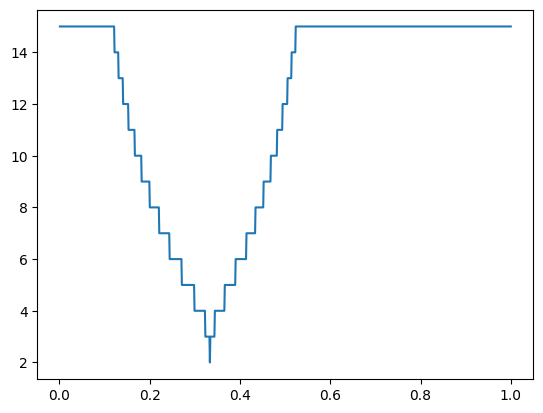

0.3333333333333333


In [4]:
# Problem 4
def optimal_alpha(f, x0, Df, tol=1e-5, maxiter=15):
    """Run Newton's method for various values of alpha in (0,1].
    Plot the alpha value against the number of iterations until convergence.

    Parameters:
        f (function): a function from R^n to R^n (assume n=1 until Problem 5).
        x0 (float or ndarray): The initial guess for the zero of f.
        Df (function): The derivative of f, a function from R^n to R^(nxn).
        tol (float): Convergence tolerance. The function should returns when
            the difference between successive approximations is less than tol.
        maxiter (int): The maximum number of iterations to compute.

    Returns:
        (float): a value for alpha that results in the lowest number of
            iterations.
    """
    a_s = np.linspace(0, 1, 1000)[1:]      #define our a's which we will test
    iters = []
    for a in a_s:
        iters.append((newton(f, x0, Df, alpha=a)[2]))      #for each choice of a, get the number of iterations used in Newton's Method

    plt.plot(a_s, iters)                                   #plot the number of iterations against the values of a
    plt.show()

    return a_s[np.argmin(iters)]                           #return the a value that results in the least number of iterations

def test4():
    f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
    Df = lambda x: (1./3)*np.power(np.abs(x), -2./3)
    print(optimal_alpha(f, .01, Df))
test4()

In [5]:
# Problem 6
def prob6():
    """Consider the following Bioremediation system.

                              5xy − x(1 + y) = 0
                        −xy + (1 − y)(1 + y) = 0

    Find an initial point such that Newton’s method converges to either
    (0,1) or (0,−1) with alpha = 1, and to (3.75, .25) with alpha = 0.55.
    Return the intial point as a 1-D NumPy array with 2 entries.
    """
    x_s = np.linspace(-.25, 0, 100)         #define the rectangle that contains the points that we will test
    y_s = np.linspace(0, .25, 100)

    f = lambda x: np.array([5 * x[0] * x[1] - x[0] * (1 + x[1]), - x[0] * x[1] + (1 - x[1]) * (1 + x[1])])    #define f
    Df = lambda x: np.array([[4 * x[1] - 1, 4 * x[0]], [-x[1], -x[0] - 2 * x[1]]])     #define Df
    sol1 = np.array([0,1])           #define our three solutions
    sol2 = np.array([0, -1])
    sol3 = np.array([3.75, .25])
    for x in x_s:            #test each x,y combination
        for y in y_s:
            option = np.array([x, y])
            sol = newton(f, option, Df, tol=1e-5, maxiter=15, alpha=1.)[0]        #use newton's method to iterate
            if np.allclose(sol, sol1) or np.allclose(sol, sol2):                  #if our point converges move to either solution move on to the next test
                sol = newton(f, option, Df, tol=1e-5, maxiter=15, alpha=.55)[0]
                if np.allclose(sol, sol3):
                    return option

<ipython-input-6-a96baf101660>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(real, imag, Y, cmap="brg")


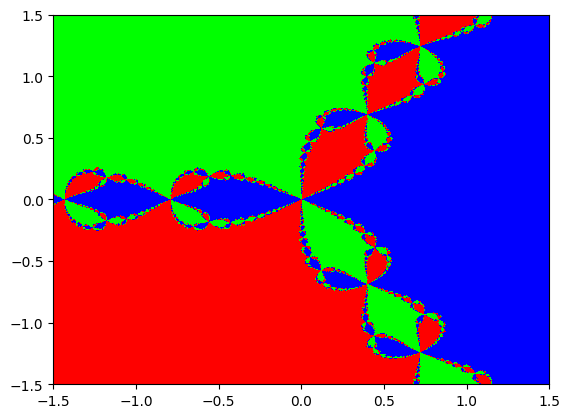

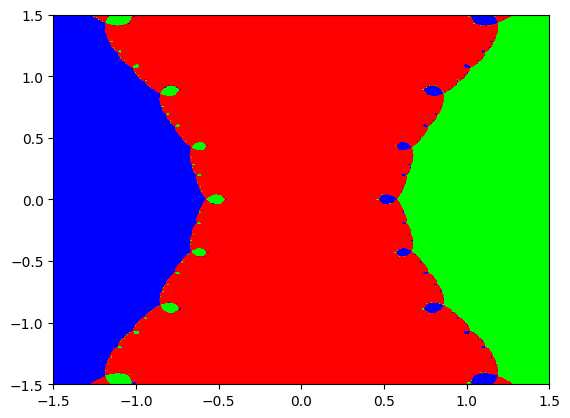

In [6]:
# Problem 7
def plot_basins(f, Df, zeros, domain, res=1000, iters=15):
    """Plot the basins of attraction of f on the complex plane.

    Parameters:
        f (function): A function from C to C.
        Df (function): The derivative of f, a function from C to C.
        zeros (ndarray): A 1-D array of the zeros of f.
        domain ([r_min, r_max, i_min, i_max]): A list of scalars that define
            the window limits and grid domain for the plot.
        res (int): A scalar that determines the resolution of the plot.
            The visualized grid has shape (res, res).
        iters (int): The exact number of times to iterate Newton's method.
    """
    real = np.linspace(domain[0], domain[1], res)      #create our real domain from the real bounds
    imag = np.linspace(domain[2], domain[3], res)      #create our imaginary domain from the imaginary bounds

    X_real, X_imag = np.meshgrid(real, imag)           

    X_0 = X_real + 1j*X_imag                           #combine real and imaginary parts

    for k in range(iters):                             #iterate Newton's Method the specified amount of times
        X_1 = X_0 - f(X_0)/Df(X_0)
        X_0 = X_1

    y1 = np.ones_like(real)
    y2 = np.ones_like(imag)

    Y_1, Y_2 = np.meshgrid(y1, y2)                     #create a new meshgrid
    Y = Y_1 + Y_2

    for i, vec in enumerate(X_0):
        for j, entry in enumerate(vec):                #each entry in the new meshgrid is the index of the closest zero to the corresponding entry in x_0
            Y[i][j] = np.argmin(np.abs(zeros - entry))
    
    plt.pcolormesh(real, imag, Y, cmap="brg")
    plt.show()

def test7():
    f = lambda x: x**3 - 1
    Df = lambda x: 3 * x**2
    domain = [-1.5, 1.5, -1.5, 1.5]
    zeros = np.array([1, -.5 - .5j * np.sqrt(3), -.5 + .5j * np.sqrt(3)])
    plot_basins(f, Df, zeros, domain)

    f = lambda x: x**3 - x
    Df = lambda x: 3 * x**2 - 1
    zeros = np.array([-1, 0, 1])
    plot_basins(f, Df, zeros, domain)
test7()